### lets first import the dataset from sklearn

In [1]:
from sklearn.datasets import fetch_openml

### create instance of mnist dataset

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### lets split the dataset into training and testing 

In [5]:
# lets import train_test_split function 
from sklearn.model_selection import train_test_split

In [6]:
t_size = 0.20 # 20% of total data is used for testing
x_train, x_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size = t_size, stratify = mnist['target'])

### let's check the shape of training and testing data

In [7]:
x_train.shape

(56000, 784)

In [8]:
x_test.shape

(14000, 784)

In [9]:
y_train.shape

(56000,)

In [10]:
y_test.shape

(14000,)

### let's see how our data looks like

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
some_digit = x_train[25000]
some_digit_image = some_digit.reshape(28,28) 

# 28x28 because we have all digits in a matrix form also resize it to plot  

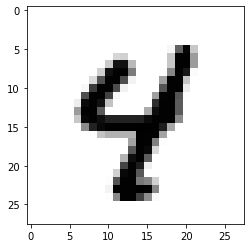

In [13]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary , interpolation = 'nearest' )

### Scaling the data

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()

In [15]:
x_train_stdsc = scaler.fit_transform(x_train)
x_test_stdsc = scaler.fit_transform(x_test)

### For this model we are using (Multi Layer Perceptron) MLP classifier

In [16]:
# import the classifier
from sklearn.neural_network import MLPClassifier

### setting hyperparameters of the network 

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.001,max_iter=5000)

### let's train the model with scaled data

In [18]:
mlp.fit(x_train_stdsc,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Predict the response for test dataset

In [19]:
y_pred = mlp.predict(x_test_stdsc) #scaled

## Checking model performance 

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Accuracy

In [21]:
print("\nAccuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.9673571428571428


### Confusion Matrix

In [22]:
print('\nConfusion Matrix is:\n',confusion_matrix(y_test, y_pred))


Confusion Matrix is:
 [[1355    0    1    0    1    9    4    5    3    3]
 [   0 1551    8    2    2    2    0    6    3    1]
 [   4    8 1340    7    6    4    5   12    8    4]
 [   2    3   19 1367    1   12    1    8    9    6]
 [   0    2    4    0 1323    0    7    3    5   21]
 [   4    3    2   19    3 1205   13    0    6    8]
 [   4    1    5    2    5    5 1347    1    5    0]
 [   1    3    8    2    5    1    0 1421    2   15]
 [   3    8    9   17    3   10    5    1 1302    7]
 [   3    1    3   10   15    8    0   13    7 1332]]


### Classification Report

In [23]:
print('\nClassification Report:\n',classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1381
           1       0.98      0.98      0.98      1575
           2       0.96      0.96      0.96      1398
           3       0.96      0.96      0.96      1428
           4       0.97      0.97      0.97      1365
           5       0.96      0.95      0.96      1263
           6       0.97      0.98      0.98      1375
           7       0.97      0.97      0.97      1458
           8       0.96      0.95      0.96      1365
           9       0.95      0.96      0.96      1392

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### Mean Squared Error

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [25]:
# To calculate MSE value we have to first convert string targets to int to
# perform calculations

y_test_int = y_test.astype(np.int8)
y_pred_int = y_pred.astype(np.int8)

In [26]:
mse = mean_squared_error(y_test_int,y_pred_int)
print("Mean Squared Error: ",mse)

Mean Squared Error:  0.5725


## Accuracy : 97% 
## F1 Score : 0.98
## MSE : 0.5725